# **Load Packages**




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# **Load Datasets**

In [ ]:
football_data=pd.read_csv(r'/Strikers_performance.csv')
football_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


# **Data Cleaning**

Missing values

In [ ]:
missing_values=football_data.isnull().sum()
missing_values

,0
Striker_ID,0
Nationality,0
Footedness,0
Marital Status,0
Goals Scored,0
Assists,0
Shots on Target,0
Shot Accuracy,0
Conversion Rate,0
Dribbling Success,0


# **Dealing with Missing values**

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(football_data[['Movement off the Ball']])
football_data['Movement off the Ball']=imputer.transform(football_data[['Movement off the Ball']])


In [ ]:
imputer=SimpleImputer(strategy='median')
imputer.fit(football_data[['Big Game Performance']])
football_data['Big Game Performance']=imputer.transform(football_data[['Big Game Performance']])

In [ ]:
imputer=SimpleImputer(strategy='median')
imputer.fit(football_data[['Penalty Success Rate']])
football_data['Penalty Success Rate']=imputer.transform(football_data[['Penalty Success Rate']])

In [ ]:
football_data.isnull().sum()

,0
Striker_ID,0
Nationality,0
Footedness,0
Marital Status,0
Goals Scored,0
Assists,0
Shots on Target,0
Shot Accuracy,0
Conversion Rate,0
Dribbling Success,0


# **Data Types**

In [ ]:
football_data.dtypes

,0
Striker_ID,int64
Nationality,object
Footedness,object
Marital Status,object
Goals Scored,float64
Assists,float64
Shots on Target,float64
Shot Accuracy,float64
Conversion Rate,float64
Dribbling Success,float64


# **Assigning Correct DataTypes**

In [ ]:
football_data['Goals Scored']=football_data['Goals Scored'].astype(int)
football_data['Assists']=football_data['Assists'].astype(int)
football_data['Shots on Target']=football_data['Shots on Target'].astype(int)
football_data['Movement off the Ball']=football_data['Movement off the Ball'].astype(int)
football_data['Hold-up Play']=football_data['Hold-up Play'].astype(int)
football_data['Aerial Duels Won']=football_data['Aerial Duels Won'].astype(int)
football_data['Defensive Contributiond']=football_data['Defensive Contribution'].astype(int)
football_data['Big Game Performance']=football_data['Big Game Performance'].astype(int)
football_data['Impact on Team Performance']=football_data['Impact on Team Performance'].astype(int)
football_data['Off-field Conduct']=football_data['Off-field Conduct'].astype(int)

In [ ]:
football_data.dtypes

,0
Striker_ID,int64
Nationality,object
Footedness,object
Marital Status,object
Goals Scored,int64
Assists,int64
Shots on Target,int64
Shot Accuracy,float64
Conversion Rate,float64
Dribbling Success,float64


## **Exploratory Analysis**

**Perform descriptive analysis**

In [ ]:
round(football_data.describe(),2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Defensive Contributiond
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.95,6.43,0.74,0.80,6.52,7.57,39.47
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.92,1.98,0.10,0.10,2.11,2.09,9.90
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.23,2.00,0.46,0.53,0.00,0.00,8.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.46,5.00,0.68,0.72,5.00,6.00,33.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.98,6.00,0.75,0.80,6.50,8.00,39.50
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.69,8.00,0.81,0.87,8.00,9.00,46.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.13,12.00,1.00,1.00,13.00,13.00,71.00


 **Perform frequency analysis**

In [ ]:
frequency_footedness=football_data['Footedness'].value_counts()
frequency_footedness

,count
Footedness,
Right-footed,267
Left-footed,233


 **Perform percentage analysis**

In [ ]:
percentage_footedness=frequency_footedness/len(football_data['Footedness'])*100
percentage_footedness

,count
Footedness,
Right-footed,53.4
Left-footed,46.6


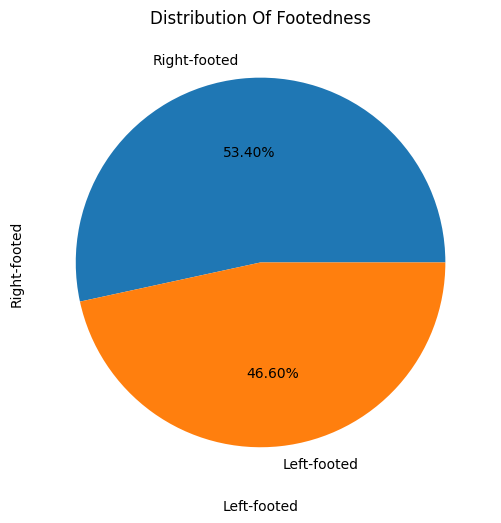

In [ ]:
plt.figure(figsize=(12,6))
percentage_footedness.plot(kind='pie',autopct='%1.2f%%')
plt.title('Distribution Of Footedness')
plt.xlabel('Left-footed')
plt.ylabel('Right-footed')
plt.show()


# **Which nationality strikers have the highest average number of goals scored?**

In [ ]:
highest_avg_goalscore=football_data.groupby('Nationality')['Goals Scored'].mean()
highest_avg_goalscore

,Goals Scored
Nationality,
Brazil,15.315789
England,13.899083
France,14.408602
Germany,14.351648
Spain,14.687500


# **What is the distribution of players footedness across different nationalities?**

In [ ]:
footedness_by_nationality = pd.crosstab(football_data['Nationality'], football_data['Footedness'])
footedness_by_nationality

Footedness,Left-footed,Right-footed
Nationality,,
Brazil,42,53
England,50,59
France,42,51
Germany,44,47
Spain,55,57


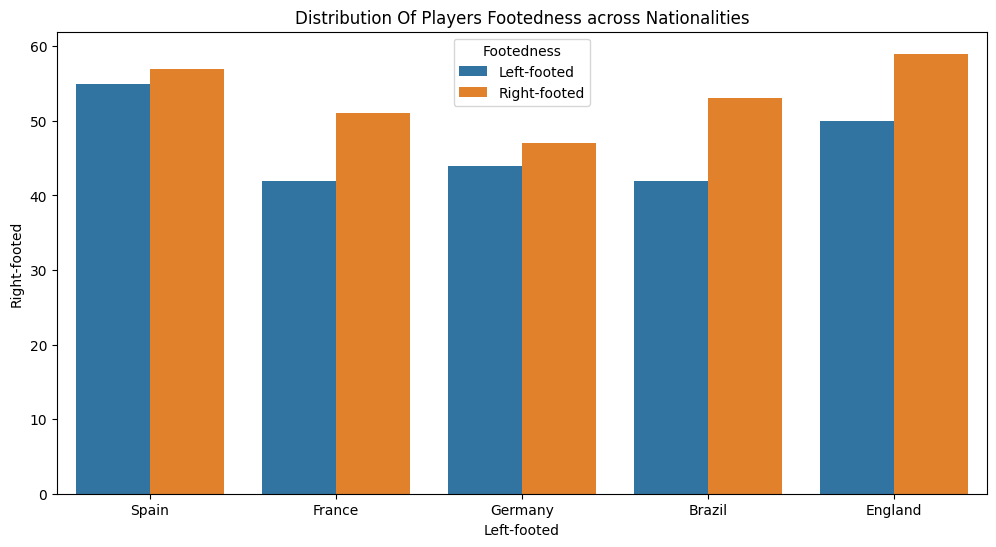

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Nationality',hue='Footedness',data=football_data)
plt.title('Distribution Of Players Footedness across Nationalities')
plt.xlabel('Left-footed')
plt.ylabel('Right-footed')
plt.show()

# **What is the average conversion rate of players based on their footedness?**

In [ ]:
avg_conversion_rate=football_data.groupby('Footedness')['Conversion Rate'].mean()
avg_conversion_rate

,Conversion Rate
Footedness,
Left-footed,0.198086
Right-footed,0.200592


# **Create a correlation matrix with a heatmap**

In [ ]:

num_variables = football_data.select_dtypes(include = ['number']).columns

correl_matrix = round(football_data[num_variables].corr(), 3)
correl_matrix

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Defensive Contributiond
Striker_ID,1.000,0.025,0.066,0.003,0.018,0.047,-0.031,0.060,-0.036,0.016,0.012,-0.052,-0.017,-0.006,-0.027,0.103,0.012
Goals Scored,0.025,1.000,-0.071,-0.059,0.066,-0.011,0.034,0.016,0.003,-0.047,0.014,-0.004,0.045,-0.021,0.103,-0.053,0.014
Assists,0.066,-0.071,1.000,0.072,-0.020,0.028,0.050,0.011,-0.046,0.001,-0.012,0.026,-0.007,-0.081,-0.022,-0.015,-0.011
Shots on Target,0.003,-0.059,0.072,1.000,-0.021,-0.044,0.010,-0.062,-0.102,-0.068,0.012,0.039,0.049,0.029,0.025,0.055,0.011
Shot Accuracy,0.018,0.066,-0.020,-0.021,1.000,-0.088,0.023,-0.018,-0.044,0.012,0.028,-0.019,0.005,0.017,0.041,0.084,0.027
Conversion Rate,0.047,-0.011,0.028,-0.044,-0.088,1.000,-0.020,0.038,0.059,0.059,-0.006,0.037,0.031,-0.049,-0.031,-0.004,-0.002
Dribbling Success,-0.031,0.034,0.050,0.010,0.023,-0.020,1.000,-0.056,0.002,-0.072,0.015,-0.059,-0.030,-0.054,-0.012,-0.060,0.015
Movement off the Ball,0.060,0.016,0.011,-0.062,-0.018,0.038,-0.056,1.000,-0.057,0.013,-0.007,-0.075,-0.030,-0.071,-0.046,-0.035,-0.006
Hold-up Play,-0.036,0.003,-0.046,-0.102,-0.044,0.059,0.002,-0.057,1.000,0.080,0.030,-0.031,0.147,0.068,-0.046,0.035,0.029
Aerial Duels Won,0.016,-0.047,0.001,-0.068,0.012,0.059,-0.072,0.013,0.080,1.000,-0.026,-0.013,0.047,-0.002,0.043,0.004,-0.025


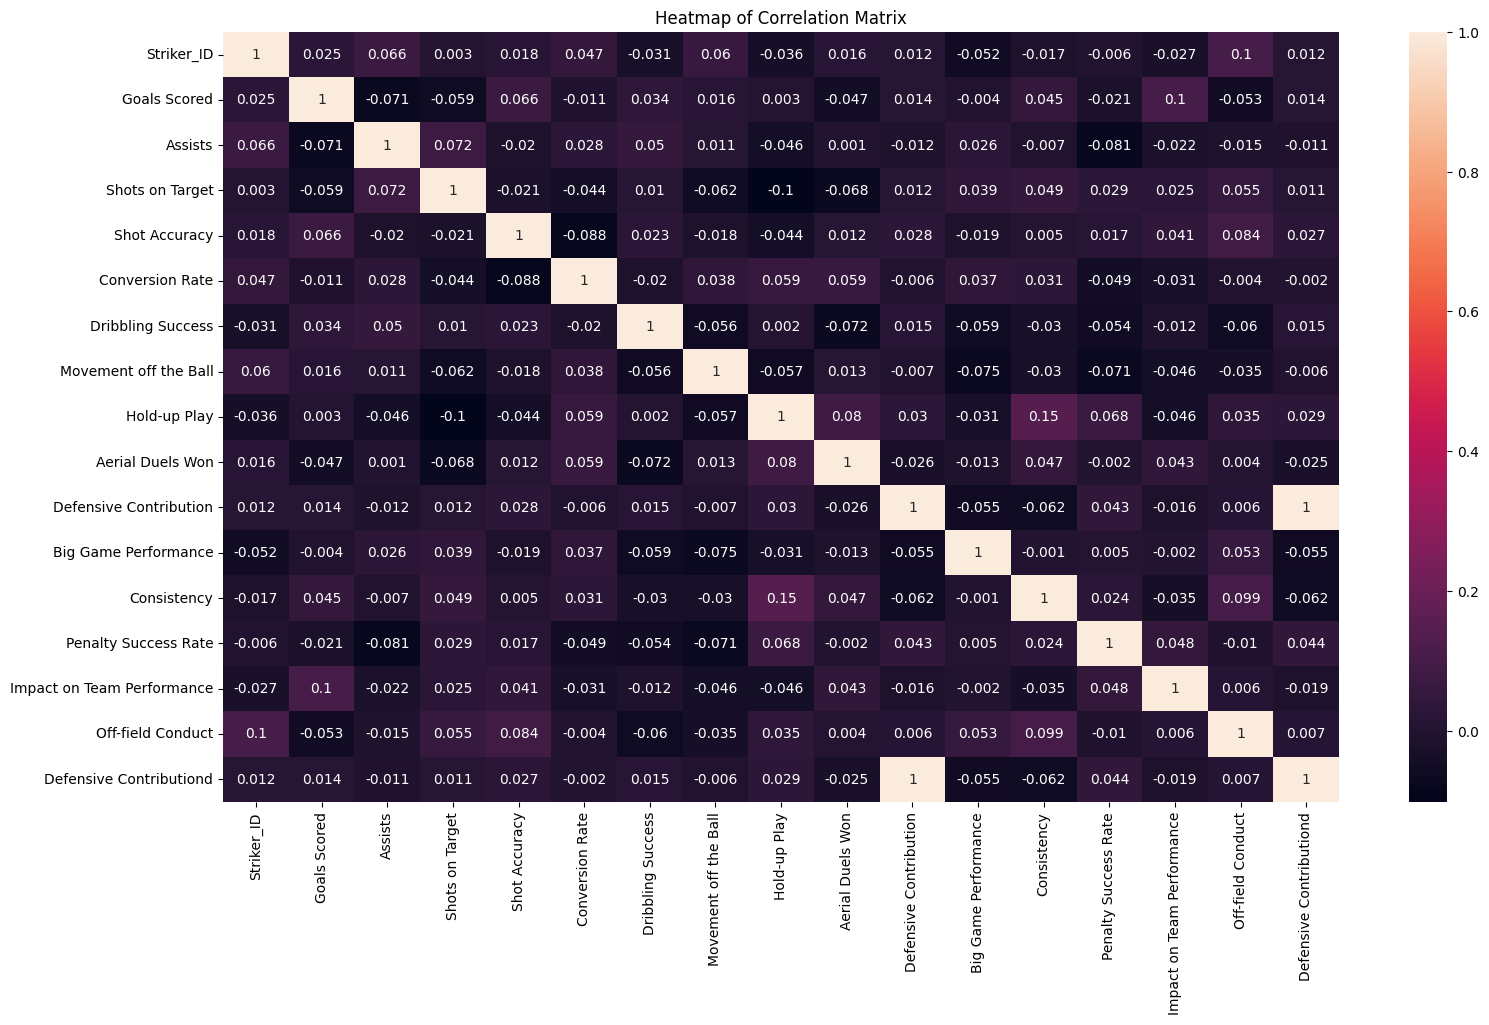

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(correl_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
football_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Defensive Contributiond
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,30.412215,6,0.820314,0.922727,8,11,30
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,26.474913,6,0.803321,0.678984,3,8,26
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,24.164116,3,0.766540,0.843858,8,9,24
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,44.129989,6,0.611798,0.662997,6,8,44
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,37.859323,8,0.701638,0.906538,8,6,37


In [ ]:
# normality test
from scipy.stats import shapiro

stat,p_value=shapiro(football_data['Consistency'])
print("p value:",p_value)

if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

p value: 0.4512769942841177
Accept null hypothesis


In [ ]:
# filtering data
from scipy import stats

Brazil_strikers=football_data.query('Nationality=="Brazil"')['Consistency']
England_strikers=football_data.query('Nationality=="England"')['Consistency']
France_strikers=football_data.query('Nationality=="France"')['Consistency']
Germany_strikers=football_data.query('Nationality=="Germany"')['Consistency']
Spain_strikers=football_data.query('Nationality=="Spain"')['Consistency']

# one way Anova
t_stat,p_value=stats.f_oneway(Brazil_strikers,England_strikers,France_strikers,Germany_strikers,Spain_strikers)
print("p value:",p_value)

if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

p value: 0.1927867603086164
Accept null hypothesis


In [ ]:
# Levene test for statistics
from scipy.stats import levene

stat,p_value=levene(Brazil_strikers,England_strikers,France_strikers,Germany_strikers,Spain_strikers)
print("p value:",p_value)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")



p value: 0.8083990355489561
Accept null hypothesis


# **Check if there is any significant correlation between strikers Hold-up Play and consistency rate**

In [ ]:
# Normality test
stat,p_value=shapiro(football_data['Hold-up Play'])
print("p value:",p_value)

if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

p value: 0.15094090394128723
Accept null hypothesis


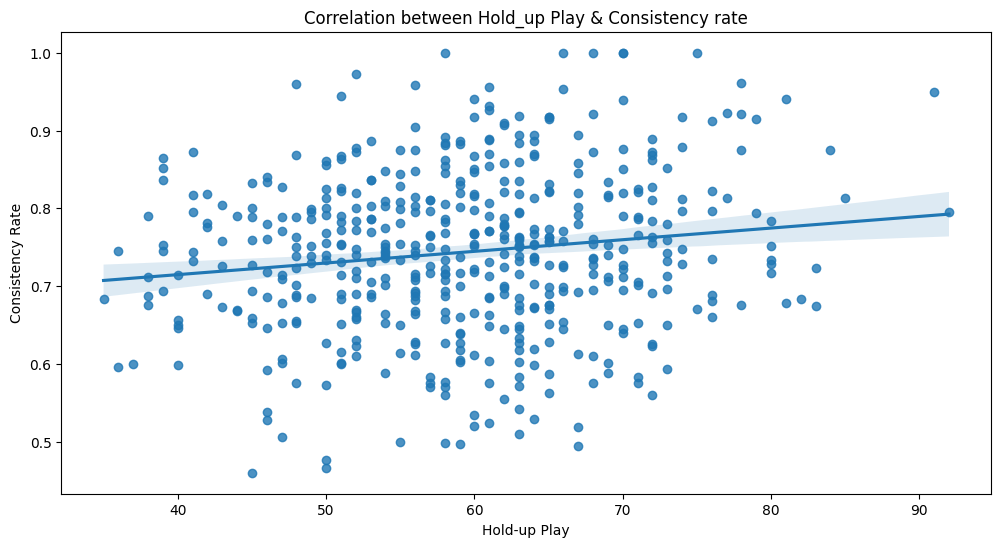

In [ ]:
# Linearity test
from scipy.stats import pearsonr

plt.figure(figsize=(12,6))
sns.regplot(x='Hold-up Play',y='Consistency',data=football_data)
plt.title('Correlation between Hold_up Play & Consistency rate')
plt.xlabel('Hold-up Play')
plt.ylabel('Consistency Rate')
plt.show()

In [ ]:
# Pearson correlation
Holdup_play=football_data['Hold-up Play']
consistency_rate=football_data['Consistency']

corr,p_value=pearsonr(Holdup_play,consistency_rate)
print("Correlation coefficient:",corr)
print("p value:",p_value)

if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Correlation coefficient: 0.14654573294046527
p value: 0.0010146962967931428
Reject null hypothesis


# **Check if strikers hold-up play significantly influences their consistency rate**

In [ ]:
import statsmodels.api as sm

x=football_data['Hold-up Play']
y=football_data['Consistency']

x_and_constant=sm.add_constant(x)
model=sm.OLS(x,x_and_constant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Hold-up Play   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.048e+31
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:15:36   Log-Likelihood:                 14604.
No. Observations:                 500   AIC:                        -2.920e+04
Df Residuals:                     498   BIC:                        -2.920e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          3.73e-14   1.33e-14      2.805   

# **Feature Engineering**

**Create a new feature- Total contribution score**

In [ ]:

football_data['Total contribution score']=(football_data['Goals Scored']+football_data['Assists']+football_data['Shots on Target']+football_data['Dribbling Success']+
                          football_data['Aerial Duels Won']+football_data['Defensive Contribution']+football_data['Big Game Performance']+football_data['Consistency'])

football_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Defensive Contributiond,Total contribution score
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,...,71,15,30.412215,6,0.820314,0.922727,8,11,30,113.989591
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,...,53,19,26.474913,6,0.803321,0.678984,3,8,26,111.075052
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,...,60,20,24.164116,3,0.766540,0.843858,8,9,24,94.597526
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,...,60,22,44.129989,6,0.611798,0.662997,6,8,44,124.380564
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,...,54,13,37.859323,8,0.701638,0.906538,8,6,37,108.152446


 **Encode the Footesness and marital status by LabelEncoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
football_data['Footedness']=encoder.fit_transform(football_data['Footedness'])
football_data['Marital Status']=encoder.fit_transform(football_data['Marital Status'])
football_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Defensive Contributiond,Total contribution score
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,71,15,30.412215,6,0.820314,0.922727,8,11,30,113.989591
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,53,19,26.474913,6,0.803321,0.678984,3,8,26,111.075052
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,60,20,24.164116,3,0.766540,0.843858,8,9,24,94.597526
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,60,22,44.129989,6,0.611798,0.662997,6,8,44,124.380564
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,54,13,37.859323,8,0.701638,0.906538,8,6,37,108.152446


**Create the dummies for Nationality and add with the data**

In [ ]:
dummies=pd.get_dummies(football_data['Nationality'])
processed_data=pd.concat([football_data,dummies],axis=1)
processed_data=processed_data.drop('Nationality',axis=1)
processed_data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Defensive Contributiond,Total contribution score,Brazil,England,France,Germany,Spain
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,30,113.989591,False,False,False,False,True
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,26,111.075052,False,False,True,False,False
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,24,94.597526,False,False,False,True,False
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,44,124.380564,False,False,True,False,False
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,37,108.152446,False,False,True,False,False


In [ ]:
Nationality_encoder=LabelEncoder()
processed_data['Brazil']=Nationality_encoder.fit_transform(processed_data['Brazil'])
processed_data['England']=Nationality_encoder.fit_transform(processed_data['England'])
processed_data['France']=Nationality_encoder.fit_transform(processed_data['France'])
processed_data['Germany']=Nationality_encoder.fit_transform(processed_data['Germany'])
processed_data['Spain']=Nationality_encoder.fit_transform(processed_data['Spain'])

In [ ]:
processed_data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Defensive Contributiond,Total contribution score,Brazil,England,France,Germany,Spain
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,30,113.989591,0,0,0,0,1
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,26,111.075052,0,0,1,0,0
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,24,94.597526,0,0,0,1,0
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,44,124.380564,0,0,1,0,0
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,37,108.152446,0,0,1,0,0


# **Cluster Analysis**

**Perform KMeans clustering**

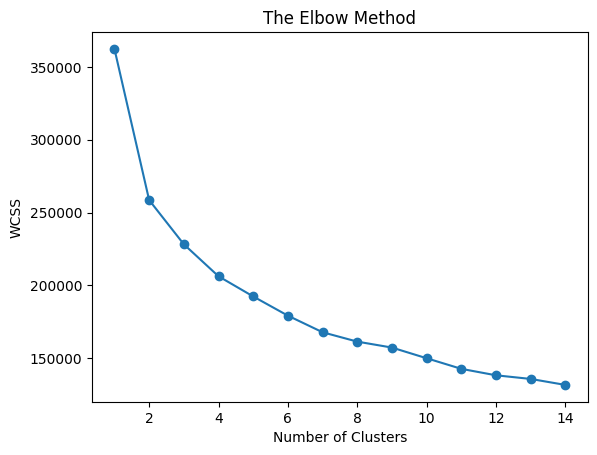

In [ ]:

import os
os.environ["OMP_NUM_THREADS"] = "2"


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize WCSS list
wcss = []

# Prepare the data
x = processed_data.drop('Striker_ID', axis=1)

# Compute WCSS for cluster counts from 1 to 14
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=1, random_state=42)
    kmeans.fit(x)
    wcss_score = kmeans.inertia_
    wcss.append(wcss_score)

# Plot the Elbow Method
plt.plot(range(1, 15), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

final_km = KMeans(n_clusters = 2,n_init=10)
final_km.fit(x)

# Generating labels
labels = final_km.labels_
labels

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [ ]:
processed_data['cluster']=labels
processed_data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Impact on Team Performance,Off-field Conduct,Defensive Contributiond,Total contribution score,Brazil,England,France,Germany,Spain,cluster
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,8,11,30,113.989591,0,0,0,0,1,0
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,3,8,26,111.075052,0,0,1,0,0,0
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,8,9,24,94.597526,0,0,0,1,0,0
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,6,8,44,124.380564,0,0,1,0,0,1
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,8,6,37,108.152446,0,0,1,0,0,0


In [ ]:
processed_data.groupby('cluster')[['Total contribution score']].mean()

,Total contribution score
cluster,
0,103.324219
1,123.701845


# **Data Preprocessing for ML**

**New feature mapping**

In [ ]:
mapping={0:'Best Strikers',1:'Regular Strikers'}
processed_data['Striker types']=processed_data['cluster'].map(mapping)

In [ ]:
mapping={'Best Strikers':1,'Regular Strikers':0}
processed_data['Striker types']=processed_data['Striker types'].map(mapping)

In [ ]:
processed_data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Off-field Conduct,Defensive Contributiond,Total contribution score,Brazil,England,France,Germany,Spain,cluster,Striker types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,11,30,113.989591,0,0,0,0,1,0,1
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,8,26,111.075052,0,0,1,0,0,0,1
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,9,24,94.597526,0,0,0,1,0,0,1
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,8,44,124.380564,0,0,1,0,0,1,0
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,6,37,108.152446,0,0,1,0,0,0,1


**Selecting Features**

In [ ]:
processed_data=processed_data.drop('Striker_ID',axis=1)

In [ ]:
processed_data.head()
x = processed_data.drop(['Striker types'], axis = 1)
y = processed_data['Striker types']

**Scaling features**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled=scaler.fit_transform(x)
scaled


array([[-1.07047781, -1.03252879,  0.5050467 , ..., -0.47169258,
         1.86125917, -1.07478947],
       [-1.07047781,  0.968496  , -0.10638998, ..., -0.47169258,
        -0.53727069, -1.07478947],
       [-1.07047781, -1.03252879,  0.70885893, ...,  2.12002488,
        -0.53727069, -1.07478947],
       ...,
       [-1.07047781,  0.968496  , -0.10638998, ..., -0.47169258,
        -0.53727069,  0.93041477],
       [ 0.93416229,  0.968496  , -0.9216389 , ..., -0.47169258,
        -0.53727069,  0.93041477],
       [-1.07047781, -1.03252879, -1.32926335, ..., -0.47169258,
        -0.53727069, -1.07478947]])

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.2,random_state=42)

# **Predictive Classification Analystics**

**Build a logistic regression machine learning model to predict strikers type**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

model= LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100,'%')

100.0 %


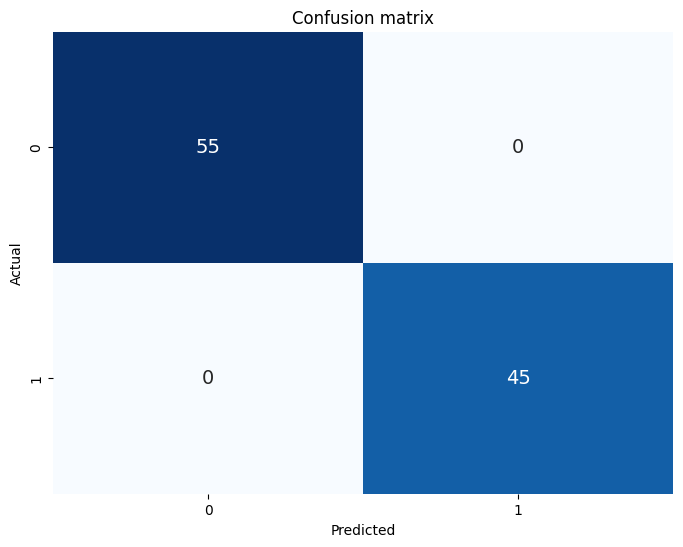

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",annot_kws={"size": 14},cbar=False)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()